In [2]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\2.concerticcir1.csv",header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [6]:
df[2].unique()

array([1., 0.])

### Observation: This comes under binary classification task.

In [7]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [8]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

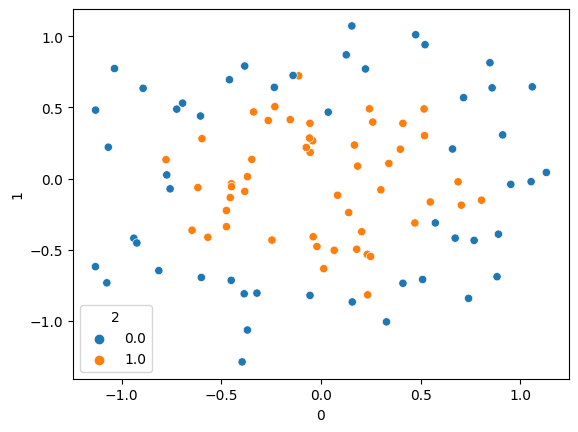

In [9]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

### Observation: By viewing this graph we can say that x and ys have non linear relationship.

In [11]:
## Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [12]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [97]:
## building Logical Structure
model=Sequential()
model.add(Dense(22,activation="tanh",kernel_regularizer=L2(0.003),bias_regularizer=L2(0.003),input_dim=2))
model.add(Dense(20,activation="tanh",kernel_regularizer=L2(0.003),bias_regularizer=L2(0.003)))
model.add(Dense(18,activation="tanh",kernel_regularizer=L2(0.003),bias_regularizer=L2(0.003)))
model.add(Dense(14,activation="tanh",kernel_regularizer=L2(0.003),bias_regularizer=L2(0.003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.003),bias_regularizer=L2(0.003)))

In [98]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 22)                66        
                                                                 
 dense_71 (Dense)            (None, 20)                460       
                                                                 
 dense_72 (Dense)            (None, 18)                378       
                                                                 
 dense_73 (Dense)            (None, 14)                266       
                                                                 
 dense_74 (Dense)            (None, 1)                 15        
                                                                 
Total params: 1185 (4.63 KB)
Trainable params: 1185 (4.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 19ms/step - loss: 0.9098 - accuracy: 0.5556 - val_loss: 0.9591 - val_accuracy: 0.4444
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8890 - accuracy: 0.4815 - val_loss: 0.9536 - val_accuracy: 0.4444
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8706 - accuracy: 0.5679 - val_loss: 0.9283 - val_accuracy: 0.4444
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8662 - accuracy: 0.5802 - val_loss: 0.8874 - val_accuracy: 0.4444
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.5679 - val_loss: 0.8882 - val_accuracy: 0.4444
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8412 - accuracy: 0.5802 - val_loss: 0.9031 - val_accuracy: 0.6667
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8225 - accuracy: 0.6420 - val_loss: 0.9031 - val_accuracy: 0.4444
Epoch 8/20
17/17 [=

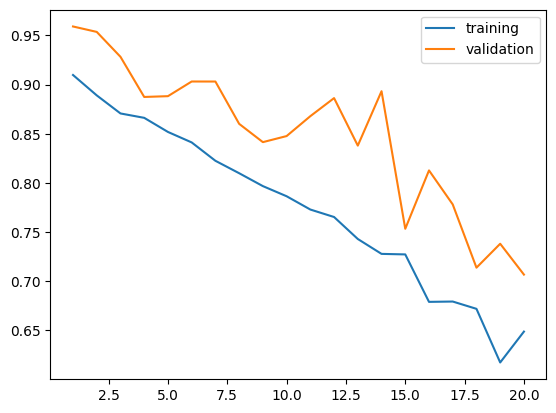

In [100]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

In [101]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 944us/step


<Axes: >

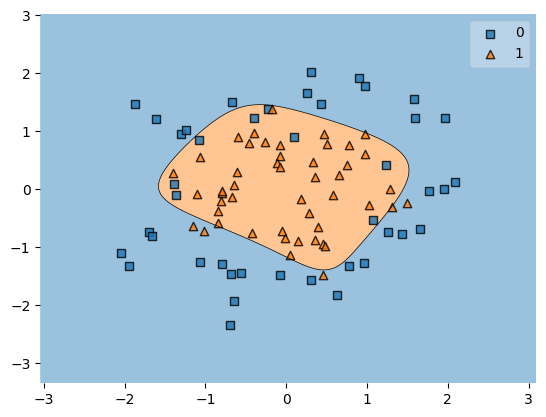

In [102]:
plot_decision_regions(x_trainp,y_train.values,clf=model)

In [125]:
model=Sequential()
model.add(Dense(24,activation="relu",input_dim=2))
model.add(Dense(22,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [126]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 24)                72        
                                                                 
 dense_92 (Dense)            (None, 22)                550       
                                                                 
 dense_93 (Dense)            (None, 20)                460       
                                                                 
 dense_94 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1103 (4.31 KB)
Trainable params: 1103 (4.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.3),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 12ms/step - loss: 0.6593 - accuracy: 0.5926 - val_loss: 0.7569 - val_accuracy: 0.5556
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7160 - val_loss: 0.7055 - val_accuracy: 0.5556
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7407 - val_loss: 0.5068 - val_accuracy: 0.8889
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.7284 - val_loss: 0.7340 - val_accuracy: 0.7778
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.8025 - val_loss: 0.6016 - val_accuracy: 0.6667
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7531 - val_loss: 1.2503 - val_accuracy: 0.5556
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.7901 - val_loss: 0.5826 - val_accuracy: 0.7778
Epoch 8/20
17/17 [=

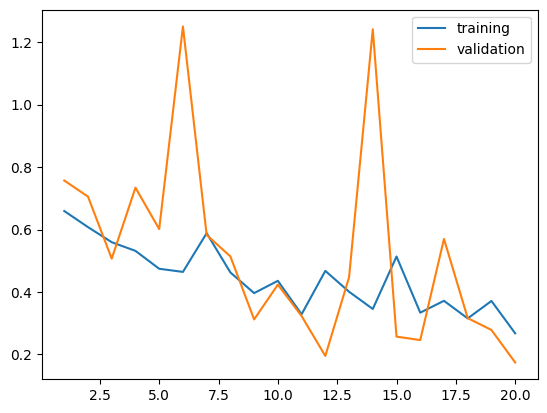

In [128]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 9s 918us/step


<Axes: >

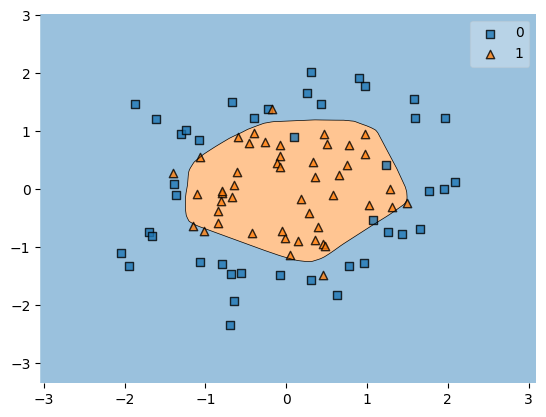

In [129]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 9s 954us/step


<Axes: >

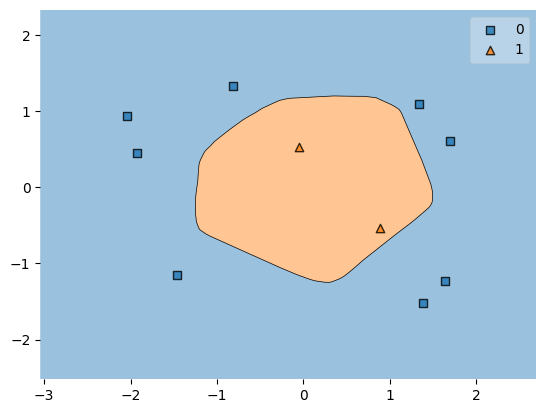

In [130]:
plot_decision_regions(x_testp,y_test.values,clf=model)

In [ ]:
## by increasing learning rate 0.1 to 0.3 and using activation function we getting best fit.